# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

* The simulation was a street-grid with two-way streets. There are 8 vertical roads and 5 horizontal directions. Cars of various colors were simulated to move periodically within this grid. The only white car (ie the Smartcab) did not move at all during the simulation. Rewards, both positive and negative, were assigned during the simulation based on the decisions that the Smartcab was making during various simulated driving scenarios. The simulation appears to be conducted over several trials, with 125 steps per trial. The status (eg, 'Success' or 'Failure') of the previous trial is prominently displayed in the graphics window, so I assume that this will eventually be utilized in the agent's learning process. The agent is currently not forced to abide by a deadline. Last, the Smartcab appears to not move because the state of the agent is not being updated during the simulation.


* The driving agent is receiving positive-valued and negative-valued rewards based on its action under each driving scenario.


* In this case, the driving agent is only receiving positive rewards for remaining still during a red stop light. These rewards are rather small in magnitude. In my observations the values range between 0.25 and 1.69 during the first trial of the simulation. I suspect the value depends on the number of cars near the Smartcab, including the presence of oncoming traffic. The agent currently receives negative rewards for not taking action when there is a green light coupled with the absence of oncoming traffic. These negative valued rewards have larger magnitude (e.g., absolute value) than the positive rewards. In my observations, the negative rewards vary between -4.09 and -5.78 during the fourth trial.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

* Here are three of many flags in 'agent.py':

    [1] learning: this is a boolean flag. If True, the agent is expected to learn using Q-learning. If False, the agent is not expected to learn.
    
    [2] alpha: this is a continuous value for the learning rate. It has a default value of 0.50
    
    [3] testing: This is a boolean flag. If True, then a set of test trials are conducted after all of the training trials have completed. Otherwise, no test trials will be utilized.
     

* In the environment.py file, the Environment class function named 'act()' will be called when an agent performs an action. This function considers the action and performs it if it's legal. Then a reward is assigned to the agent based on the traffic laws.


* simulator.py: The render_text() function is for rendering the simulated trial data in the terminal / command prompt. That is, this is a non-GUI rendering of the simulation. The render() function, on the other hand, does render the simulation in the GUI.


* planner.py: The 'next_waypoint()' function will first consider if the destination is East or West of the current location.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


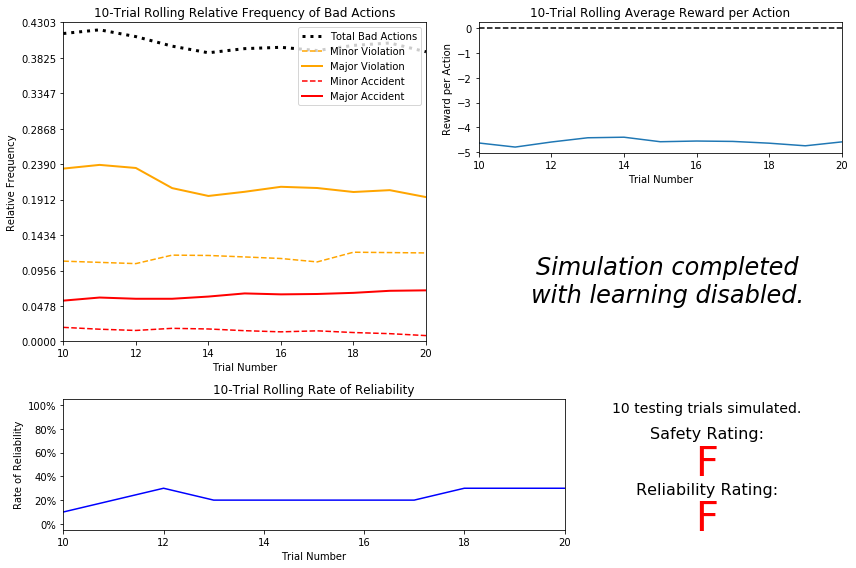

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

During this simulation the Smartcab commited random actions during each time step and was instructed to not learn from the training sessions. The result is that the cab received an 'F' for Safety and for Reliability during testing. During training, the SmartCab regularly committed "Bad Actions" about 40% of the time, including being involved in minor & major traffic violations about 30% of the time, and also did not reach its destination on time.

* According to the top-left graph, the driving agent makes bad decisions about 40% of the time. The agent gets into accidents about 5% of the time.

* The Reliability Rating for this agent is an F. This certainly seems appropriate and reasonable for a driving agent that acts randomly. The 10-trial rolling rate of reliability hovers around 20%.

* The driving agent is receiving positive rewards for taking actions that are legal and safe. The agent also receives negatives rewards for illegal and unsafe actions. Since this agent is acting randomly, and consequently making bad actions quite frequently, the average reward is approximately -4.5. This estimated negative average indicates that the agent has been substantially penalized for its wrong choices. This makes sense since the agent is randomly acting, which means that it's more likely to make wrong choices under any given state.

* The outcomes do not really change as the number of trials increases. This is to be expected, since the agent's actions are  random. Any differences in outcomes that occur over the trials is due to randomness.

* This Smartcab would not be considered safe nor reliable for its passengers. A cab that acts randomly rather than through informed reasoning is unsafe for passengers and other drivers on the road. The fact that this cab makes random decisions also means that it is unlikely to reach its destination within a given time limit, if it reaches the destination at all. This is an unreliable cab.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

The 'waypoint' feature is important, since the agent will learn to use the waypoint for efficiently navigating toward its final destination. Whenever the agent idles under proper circumstances (ie, no traffic violation), it will receive a reward with a higher value if idling is consistent with the next waypoint. However, it will receive a lower reward if idling is valid under the current traffic conditions but not consistent with the next waypoint (ie, non-optimal route).

The 'deadline' feature is not necessary for the agent to learn safety or efficiency. While 'deadline' is used to assign penalties and to determine if the agent has arrived at the destination within the given time, the agent really only needs to be guided by the waypoint, which when followed will implicitly yield the shortest arrival time. If the agent learns to follow the waypoint, then it will have implicitly learned to abide by the 'deadline'.

From the list of 'inputs' features, the value of 'light' is extremely helpful for learning safety. For example, the agent will learn that crossing an intersection on a red light is incorrect (ie, Major Violation) and that it is unsafe to do so in the presence of cross-traffic from the left and/or right (ie, Accident). It will learn that moving forward on a green light is okay, that remaining idle on a green light is bad, and that a left turn on a green light is permissible only when oncoming traffic is not moving straight or turning right (otherwise causing an accident). Assuming that all other cars on the road obey traffic rules, the agent only needs to be aware of inputs['oncoming'], which will be useful when the Smartcab wants to turn left on a green light. 

The inputs['left'] feature will be used here in order to allow the agent to learn that it is okay to turn right on a red light, provided that either no other agents are present on the left side or that the agent to the left is not crossing the intersection.

The inputs['right'] feature will be left out of this Q-learning agent's state space. The reason is that the intended direction of travel of an agent coming from the right only matters in an environment for which other agents are allowed to violate traffic laws (leading to collisions). Utilizing inputs['right'] in such an environment would allow the SmartCab agent to learn to avoid entering the intersection on a green light whenever an agent to the right chooses to cross the intersection. In the environment for this project, however, all other agents are required to obey the traffic laws. Consequently, the SmartCab agent will not need to be concerned with the direction of travel of inputs['right']. Plus, the SmartCab agent will learn (via penalties) that running a red light is incorrect and that it may collide with an agent from the right and/or the left, consequently receiving larger penalties, if it does so.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

The state is defined as a 4-tuple which contains the waypoint, color of traffic light, direction of oncoming traffic, and direction of traffic from the left:

state = (('way_point', waypoint),('traffic_light',inputs['light']), ('oncomingdir',inputs['oncoming']), ('leftdir',inputs['left']))

This leads to $3*2*4*4 = 96$ unique state values. 

While 96 is a large number of unique states, it turns out we can expect the driving agent to learn a policy for each possible state given a reasonable number of training trials. This can be understood by examining the graph below which plots Percentage of States Visited vs Number of Steps. This graph demonstrates that for 96 unique states, it's possible for the agent to visit each state within 350-400 steps. This translates to 3 or 4 trials if each trial consists of 125 steps. For our SmartCab learning environment, the simulation will consist of a minimum of 20 trials. So, the agent could take $ 125 * 20 = 2500 $ steps, which would be plenty of opportunity for the agent to visit several, though not necessarily all, states. The agent probably will not utilize all 125 steps for each trial, since it will reach the destination at times. But generally speaking, given enough trials, the agent will visit every state. I can expect the agent to learn the optimal policy given enough training time.

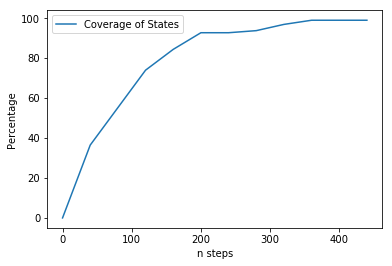

In [29]:
# This code was provided directly to me by a Udacity MLND Reviewer:
# https://review.udacity.com/#!/reviews/939707

import numpy as np
import random

def percent_visited(steps, states):
    visited = np.zeros(states, dtype=bool)
    for _ in range(steps):
        current_state = random.randint(0, states-1)
        visited[current_state] = True
    return sum(visited)/float(states)*100


import matplotlib.pyplot as plt
%matplotlib inline

states = 96

n_steps = [s*40 for s in range(12)]
coverage = [percent_visited(steps, states) for steps in n_steps]
plt.plot(n_steps, coverage, label = 'Coverage of States')
plt.xlabel('n steps')
plt.ylabel('Percentage')
plt.legend()

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simulation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

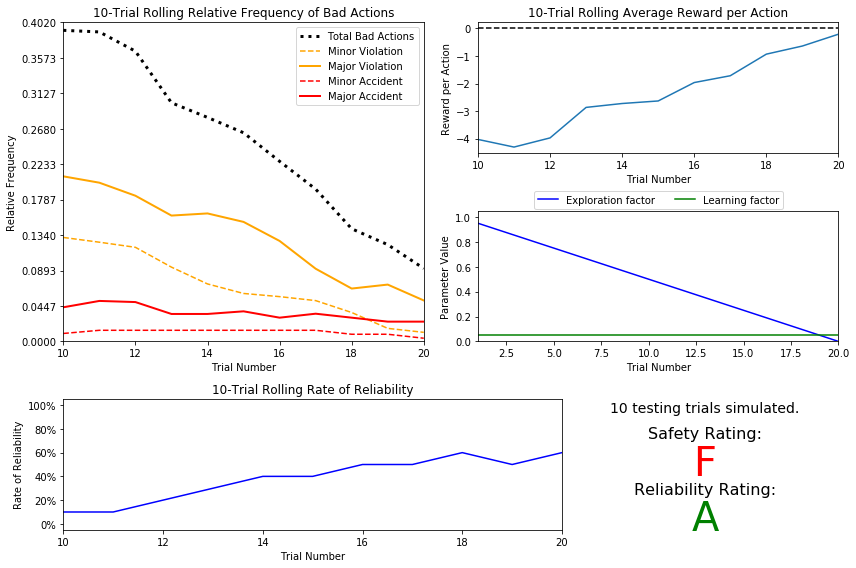

In [33]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

This Q-learning driving agent performed better than the default Q-learning agent which was not allowed to learn at all. This agent clearly learned from the training trials. This is indicated by the fact that as the number of trials increased, the average rewards increased and the number of bad actions decreased. In fact, the rate of bad accidents reduced to about 9% by the end of training. This is a stark contrast to the default learning agent which committed bad accidents at a rate of 38% or more throughout its training period. The rate of reliability also increased throughout training, with a value of approximately 10% at the 10th trial and increasing to a final value of about 60% by the 20th trial (ie, at the end of training). These are substantial improvements over the default agent.

* This Q-learning agent and the default Q-learning agent were both involved in minor accidents roughly 2% of the time.


* The driving agent utilized 20 training trials before testing. This number of trials is correct. The starting value of epsilon was 1.0, and it was decremented in units of 0.05. This decrement size partitions the training set into 20 trials.


* A linear decaying function was implemented here and is represented in the parameters panel. The graph of the Exploration Factor is a straight line with negative slope. Additionally, the constant alpha parameter is accurately represented in the graph as a flat straight line with constant value of 0.5.


* As the number of training trials increased the total number of bad actions decreased. Also, the total number of minor traffic violations, major traffic violations, and major accidents decreased as the number of training trials increased. The number of minor accidents was consistently near the 2% mark throughout all trials. The average reward increased as the number of trails increased. This is indicative of the fact that the driving agent was learning from its successes and failures. As the agent gathered more experience it was able to make correct decisions more frequently, and thus converted its average rewards from negative values to positive values upon concluding the trial stage.


* The safety and reliability ratings for this implementation of the Q-learning Driving Agent are both A+. These ratings are much better than the ratings (ie, Fs) achieved by the initial driving agent, which only made random decisions and which was not allowed to learn.


The results show that the agent is learning. A quick peak at sim_default-learning.txt reveals that the agent visited 81 of the 96 states. And for some of these visited states, the agent did not learn the optimal policy. Here is an example where the optimal action is to go 'forward' but the agent has learned to turn right:

        State: (('way_point', 'forward'), ('traffic_light', 'green'), ('oncomingdir', 'right'), ('leftdir', None))
        Action-Rewards: {forward : 0.00, right : 0.17, None : 0.00, left : 0.00}

It's possible that with additional trials, this agent will visit the remaining states and learn the optimal policies for all 96.

Overall, this cab is reliable but it is not safe.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

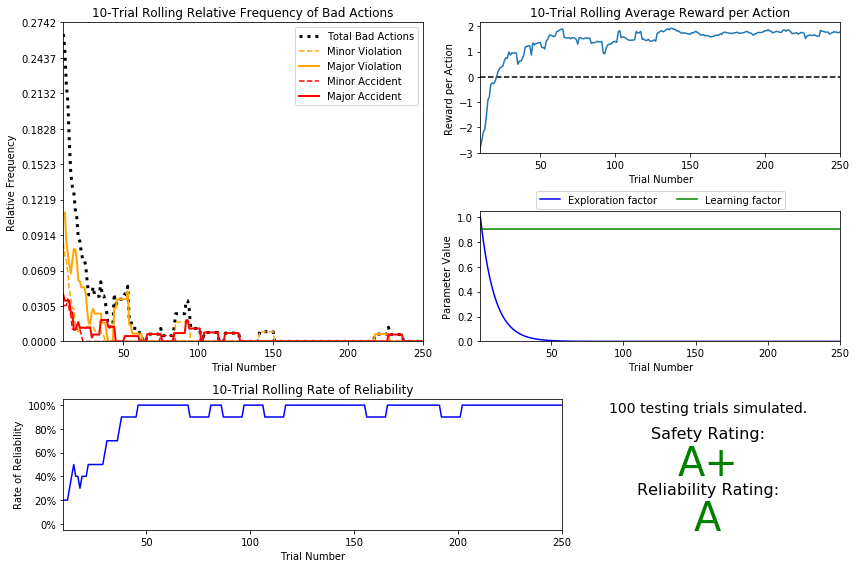

In [19]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

This Q-learning agent was able to reduce Total Bad Actions to about 1% and increase Rate of Reliability to approximately 100%. The 10-Trial rolling average reward per action also increased to approximately 1.8; the previous learning agent achieved an  average reward per action of about -0.1. This was achieved after 250 training trials. From the graph of 'Total Bad Actions' it appears that the majority of the learning occured after approximately 125-150 training trials, but there were still some learning that occurred around 225 training trials. It would be interesting to see what the metrics would be even beyond 250 training trials, but given the 0% or near 0% rate of Total Bad Actions between the 150th and 225th trial, I suspect that more trials beyond 250 would provide marginal improvements. The fact that the Rate of Reliabity toggled between 100 and approximately 90 between 50 and 200 training trials indicates that the agent was still learning to follow the waypoint during those phases of training. 

In order to be convinced of this agent's current capability, I utilized 100 testing trials for the Reliability and Safety Ratings, which were A+ and A, respectively. I am happy with the results---namely the Rate of Reliability and Relative Frequency of Bad Actions by the end of trial 250.


- The following decaying function was used for epsilon:
$$ \epsilon = a^{t}, \textrm{ where } a = 0.9025  $$ 


- This learning agent utilized 250 training trials and 100 testing trials.


- The epsilon value here was 0.05. The alpha value was constant at 0.9025. Tolerance was set to 8.9 e-12 so that 250 training trials could be achieved.


- This learning agent made fewer Total Bad Actions after 250 trials, with a value near 1%. This is much less than the default Q-Learner, which generated Bad Actions about 11% of the time.


- The results of this particular simulation indicate that the driving agent successfully learned an appropriate policy. The average reward value increased from a negative amount to approximately 1.8 as the number of trials increased. Additionally, the number of bad actions, traffic violations, and traffic accidents reduced as the number of training trials increased. The rate of reliablity increased up to 50 training trials, after which the reliability rate toggled between 90 and 100, indicating that the agent was still learning. And finally, the driving agent performed well on the test trials. It's definitely evident that the learning agent learned a policy.


- The safety and reliability ratings were A+ and A. I am definitely satisfied with these results.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

[1] The optimal policy is the following:

    When the light is red and the waypoint is either 'straight' or 'left', the agent should remain idle.

    When the light is red, the waypoint is 'right', and traffic from the left is heading 'straight', then the agent should remain idle.
    
    When the light is red, the waypoint is 'right', and traffic from the left is 'None' or turning 'right', then the agent should turn right.
        
    When the light is green and the waypoint is 'straight', the agent should go straight.
    
    When the light is green and the waypoint is 'right', the agent should turn right.
    
    When the light is green, the waypoint is 'left', and input['oncoming'] is 'left' or 'None', then the agent should turn left.
    
    When the light is green, the waypoint is 'left', and input['oncoming'] is 'straight' or 'right', then the agent should remain idle.


[2] The agent visited all of the 96 possible states. It learned the correct policy many times. This is indicated by the A/A+ ratings that it achieved in the 100 test trials, and it's also reflected in the safety and efficiency rates it earned during training. However, for some states it did not learn the optimal policy. Examples of correct and incorrect policies are provided in the next two responses.


[3] Here are three examples when the agent learned the optimal policy:

   a. When the light was red, the waypoint was right, and traffic to the left was going 'forward', the agent learned to remain idle / 'None'. The highest valued action was 'None' with a value of 1.39. All other actions had negative values, which is definitely correct. The agent should be penalized for doing anything but remaining idle.
   
       State          --> (('way_point', 'left'), ('traffic_light', 'red'), ('oncomingdir', 'left'), ('leftdir','forward')) 
       Actions/Values --> {forward : -35.40, right : -17.97, None : 1.39, left: -36.75}
 
 
 
   b. The agent learned to remain idle when the waypoint was left and the traffic light was red. The value for remaining idle was 2.07. The values for all other actions were 0.
   
       State          --> (('way_point', 'left'), ('traffic_light', 'red'), ('oncomingdir', 'left'), ('leftdir','forward')) 
       Actions/Values --> {forward : 0.00, right : 0.00, None : 2.07, left : 0.00}


   c. The agent learned to turn left on a green light when the waypoint was left and oncoming traffic was non-existent / 'None'. It also learned that remaining idle was bad.
   
       State       --> (('way_point', 'forward'), ('traffic_light', 'green'), ('oncomingdir', 'left'), ('leftdir','forward')) 
       Actions/Values --> {forward : 0.20, right : 0.83, None : -4.87, left : 2.54}


[4] Here is an example when the agent did not learn the optimal policy. The way point was to the right, the light was green, oncoming traffic was turning right (with left hand traffic being ignorable in this case), but agent moved 'forward' when it should have turned right.

        State --> (('way_point', 'right'), ('traffic_light', 'green'), ('oncomingdir', 'right'), ('leftdir', 'right'))
        Actions/Values --> {forward : 0.60, right : 0.00, None : -4.71, left : 0.00}

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

One reason that future rewards are not valid for this project is that the Smartcab can only perceive information during its current state. The agent cannot perceive the color of the traffic light nor the presence of other agents (and their intended actions) in future states. Consequently, the calculation of future rewards is not possible.

Along these lines, a second reason that future rewards is invalidated for this project has to do with the environment. It's not feasible to know what the traffic conditions will be for each future time step. Even if it were possible to calculate these in advance, this task would be computationally expensive to the point that it's prohibitive.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.